In [ ]:
import pandas as pd
import pyextremes 
from matplotlib import pyplot as plt
import numpy as np

df=pd.read_csv("dataset/test_data.csv")
df.head(20)
df.columns
df=df.loc[df.groupby('event_id')['time_to_tca'].idxmin()]
data=df[['event_id','time_to_tca']].copy()
print ("# ", data.count())
plt.figure(figsize=(10, 5))
# plt.scatter(data['event_id'],data['time_to_tca'],color='red')
plt.plot(data['event_id'],data['time_to_tca'],color='blue')




KeyError: 'event_id'

POT= 197
Index(['event_id', 'time_to_tca'], dtype='object')
2167 2167


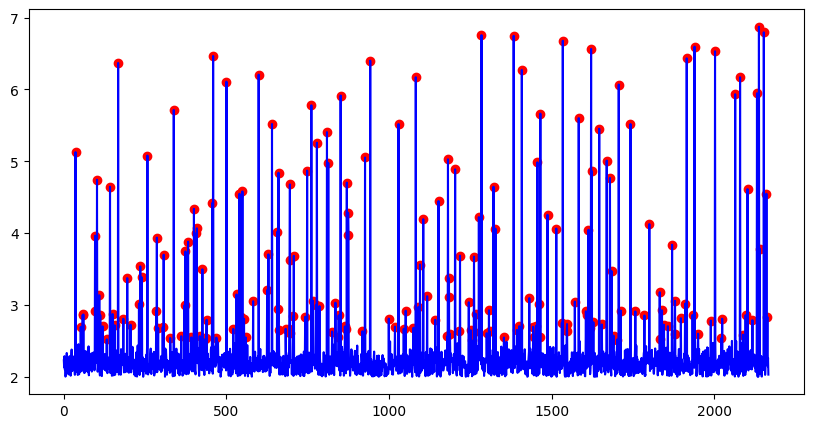

In [167]:

# threshold=data['time_to_tca'].quantile(0.5)
threshold=2.5

extremes = data[data['time_to_tca'] > threshold]
print("POT=", len(extremes))
print (extremes.columns)

# #BM
# # Set your block size (e.g., '30D' for 30-day blocks)
# block_size = 300

# # Calculate block groups
# block_groups = (data.index - data.index[0]) // block_size
# # Find maxima indices and filter the DataFrame
# min_indices = data.groupby(block_groups)['time_to_tca'].idxmin()
# extremes = data.loc[min_indices]
# print("BM= ",len(extremes))
plt.figure(figsize=(10, 5))
print(len(data['event_id']),len(data['time_to_tca']))
plt.plot(data['event_id'],data['time_to_tca'],color='blue')
plt.scatter(extremes['event_id'],extremes['time_to_tca'],color='red')

(array([1.27901985, 1.10460805, 1.04647078, 0.87205899, 0.93019625,
        0.46509813, 0.46509813, 0.29068633, 0.        , 0.11627453,
        0.05813727, 0.1744118 , 0.11627453, 0.29068633, 0.11627453,
        0.11627453, 0.1744118 , 0.34882359, 0.05813727, 0.11627453,
        0.1744118 , 0.05813727, 0.05813727, 0.1744118 , 0.23254906,
        0.1744118 , 0.11627453, 0.11627453, 0.23254906, 0.11627453,
        0.05813727, 0.05813727, 0.        , 0.11627453, 0.1744118 ,
        0.05813727, 0.11627453, 0.05813727, 0.        , 0.1744118 ,
        0.05813727, 0.1744118 , 0.05813727, 0.05813727, 0.1744118 ,
        0.05813727, 0.1744118 , 0.05813727, 0.11627453, 0.11627453]),
 array([2.50744402, 2.59475707, 2.68207012, 2.76938317, 2.85669623,
        2.94400928, 3.03132233, 3.11863538, 3.20594843, 3.29326149,
        3.38057454, 3.46788759, 3.55520064, 3.6425137 , 3.72982675,
        3.8171398 , 3.90445285, 3.99176591, 4.07907896, 4.16639201,
        4.25370506, 4.34101811, 4.42833117, 4.

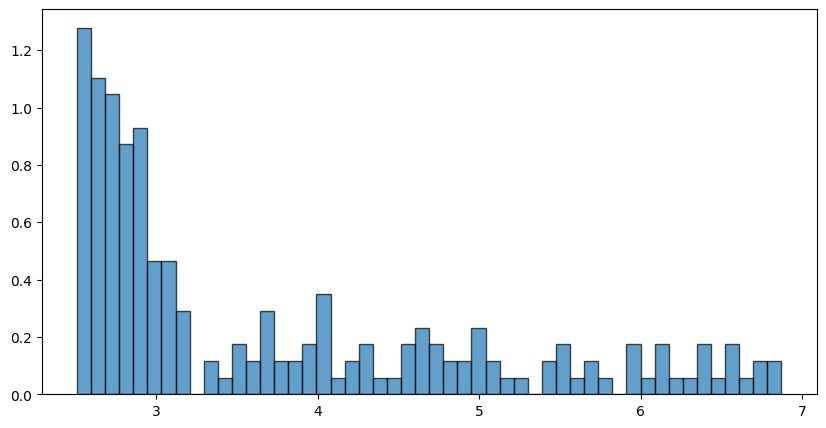

In [185]:
bs=50
plt.figure(figsize=(10, 5))
plt.hist(extremes['time_to_tca'], bins=bs, density=True,edgecolor='black', alpha=0.7)

50 50


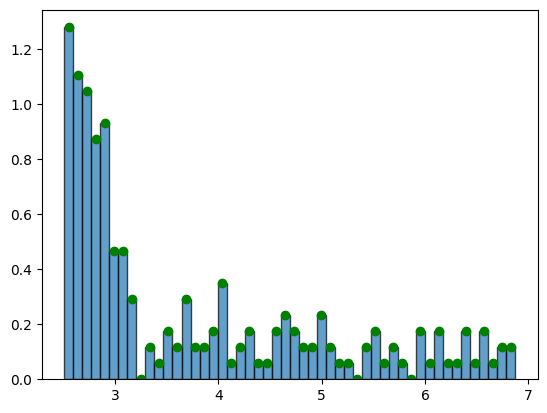

In [169]:
# print (extremes)
y_obser, bin_edges = np.histogram(extremes['time_to_tca'], bins=bs, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
print (len(y_obser),len(bin_centers))
plt.hist(extremes['time_to_tca'], bins=bs,density=True, edgecolor='black', alpha=0.7)
plt.scatter(bin_centers,y_obser,color='green')



0.838361819541774 2.5074440162037037 1.0681850463207097
2.507444016203704 1.2002420590689042
-0.9735030071800246 2.8476103174982557 0.43013718631702885


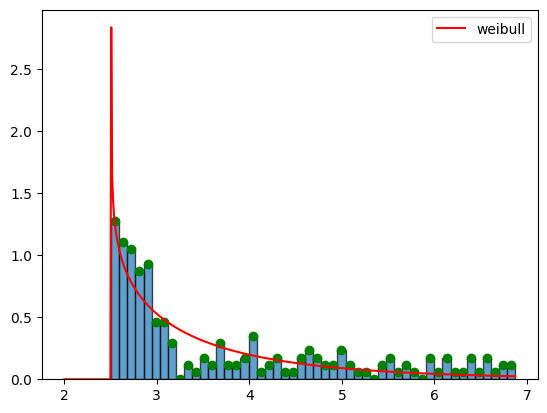

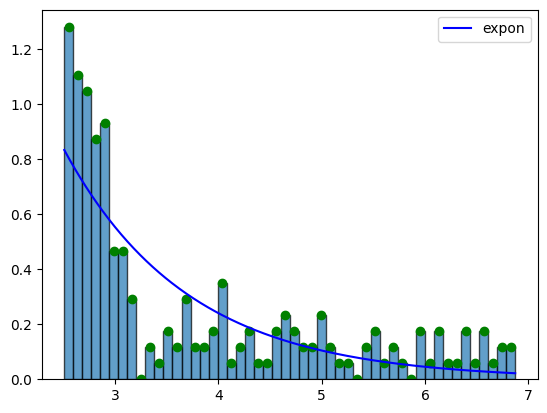

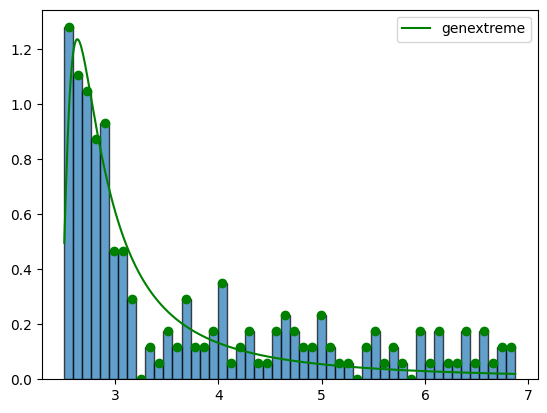

In [181]:
from scipy.stats import weibull_min,expon,genextreme
x_axis= np.linspace(extremes['time_to_tca'].min(), extremes['time_to_tca'].max(), 500) 
x_axis2= np.linspace(2, extremes['time_to_tca'].max(), 500) 
c1,l1,s1 = weibull_min.fit(extremes['time_to_tca'])
l2,s2 = expon.fit(extremes['time_to_tca'])
c3,l3,s3 = genextreme.fit(extremes['time_to_tca'])
print(c1,l1,s1)
print(l2,s2)
print(c3,l3,s3)


pdf1= weibull_min.pdf(x_axis2,c1,l1,s1)
pdf2= expon.pdf(x_axis,l2,s2)
pdf3= genextreme.pdf(x_axis,c3,l3,s3)
plt.hist(extremes['time_to_tca'], bins=bs,density=True, edgecolor='black', alpha=0.7)
plt.scatter(bin_centers,y_obser,color='green')
plt.plot(x_axis2,pdf1,color='red',label='weibull')
plt.legend()
plt.show()
plt.hist(extremes['time_to_tca'], bins=bs,density=True, edgecolor='black', alpha=0.7)
plt.scatter(bin_centers,y_obser,color='green')
plt.plot(x_axis,pdf2,color='blue',label='expon')
plt.legend()
plt.show()
plt.hist(extremes['time_to_tca'], bins=bs,density=True, edgecolor='black', alpha=0.7)
plt.scatter(bin_centers,y_obser,color='green')
plt.plot(x_axis,pdf3,color='green',label='genextreme')
plt.legend()
plt.show()





In [177]:
def r2(y_pred,y_obser):
    mean= y_obser.mean()
    print("mean= ",mean)
    SSr=0
    i=0

    while i<len(y_obser):
        SSr=SSr+(y_obser[i]-y_pred[i])**2
        i=i+1
    print("SSr= ",SSr)
    SSt=0
    i=0
    while i<len(y_obser):
        SSt=SSt+(y_obser[i]-mean)**2
        i+=1
    print("sst= ",SSt)
    

    rsq=1-(SSr/SSt)
    return print (f"r2= {rsq}")


In [178]:

pdf1= weibull_min.pdf(bin_centers,c1,l1,s1)
# print(len(pdf1),len(y_obser))

# print(pdf1)
# print(y_obser)
pdf2= expon.pdf(bin_centers,l2,s2)
pdf3= genextreme.pdf(bin_centers,c3,l3,s3)
r2(pdf1,y_obser)
r2(pdf2,y_obser)
r2(pdf3,y_obser)

mean=  0.229060827330698
SSr=  0.8697098835265482
sst=  4.29529748199352
r2= 0.7975204541309439
mean=  0.229060827330698
SSr=  1.4511753033726533
sst=  4.29529748199352
r2= 0.662147893258574
mean=  0.229060827330698
SSr=  0.7615546395314644
sst=  4.29529748199352
r2= 0.822700373437694


#Calculating returns


In [198]:
def integrate_trapezoidal(X, Y):
    return np.sum((Y[:-1] + Y[1:]) * np.diff(X)) / 2

# print (1e5)
x=np.linspace(2.5, int (1e5), int (1e7))
pdf3= genextreme.pdf(x,c3,l3,s3)
print (f"{integrate_trapezoidal(x,pdf3)*100: .4f}%")


 99.2370%
